In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [ ]:
math_data = pd.read_csv("/content/drive/MyDrive/GirlScript/student-mat.csv", sep = ";")
math_data.head(10)
type(math_data)

pandas.core.frame.DataFrame

In [ ]:
# categorical to numerical
# unique() all columns values #convert the categories into number
print(f'school: {math_data.school.unique()}')
print(f'sex: {math_data.sex.unique()}')
print(f'address: {math_data.address.unique()}')
print(f'Mjob: {math_data.Mjob.unique()}')
print(f'Fjob: {math_data.Fjob.unique()}')
print(f'higher: {math_data.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [ ]:
#convert the categories into numbers 
# 0 and 1 for binary from 1 multi-class
#binary valued
math_data['school'] = math_data['school'].apply({'GP':1, 'MS':2}.get)
math_data['sex'] = math_data['sex'].apply({'F':1, 'M':2}.get)
math_data['address'] = math_data['address'].apply({'U':1, 'R':2}.get)
math_data['higher'] = math_data['higher'].apply({'yes':1, 'no':2}.get)


#multi-valued
math_data['Mjob'] = math_data['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
math_data['Fjob'] = math_data['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

math_data.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,1,no,no,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,1,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,LE3,T,1,1,1,3,other,mother,1,2,3,yes,no,yes,no,yes,1,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,yes,yes,yes,1,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,yes,no,yes,1,no,no,4,3,2,1,2,5,4,6,10,10
5,1,2,16,1,LE3,T,4,3,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,4,2,1,2,5,10,15,15,15
6,1,2,16,1,LE3,T,2,2,3,3,home,mother,1,2,0,no,no,no,no,yes,1,yes,no,4,4,4,1,1,3,0,12,12,11
7,1,1,17,1,GT3,A,4,4,3,5,home,mother,2,2,0,yes,yes,no,no,yes,1,no,no,4,1,4,1,1,1,6,6,5,6
8,1,2,15,1,LE3,A,3,2,4,3,home,mother,1,2,0,no,yes,yes,no,yes,1,yes,no,4,2,2,1,1,1,0,16,18,19
9,1,2,15,1,GT3,T,3,4,3,3,home,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,5,1,1,1,5,0,14,15,15


In [ ]:
math_data = math_data[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]
type(math_data)
math_data.head()

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,1,1,1,1,5,1,3,2,6,5,6,6
1,1,1,1,1,3,1,3,2,4,5,5,6
2,1,1,1,1,3,1,3,2,10,7,8,10
3,1,1,1,2,4,1,2,3,2,15,14,15
4,1,1,1,3,3,1,3,2,4,6,10,10


In [ ]:
math_data.to_csv("cleaned_math_data.csv") #export the mathData as cleaned_math_Data as csv file

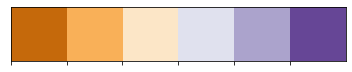

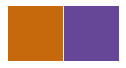

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) ##Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
math_data.columns #columns in the dataframe

Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

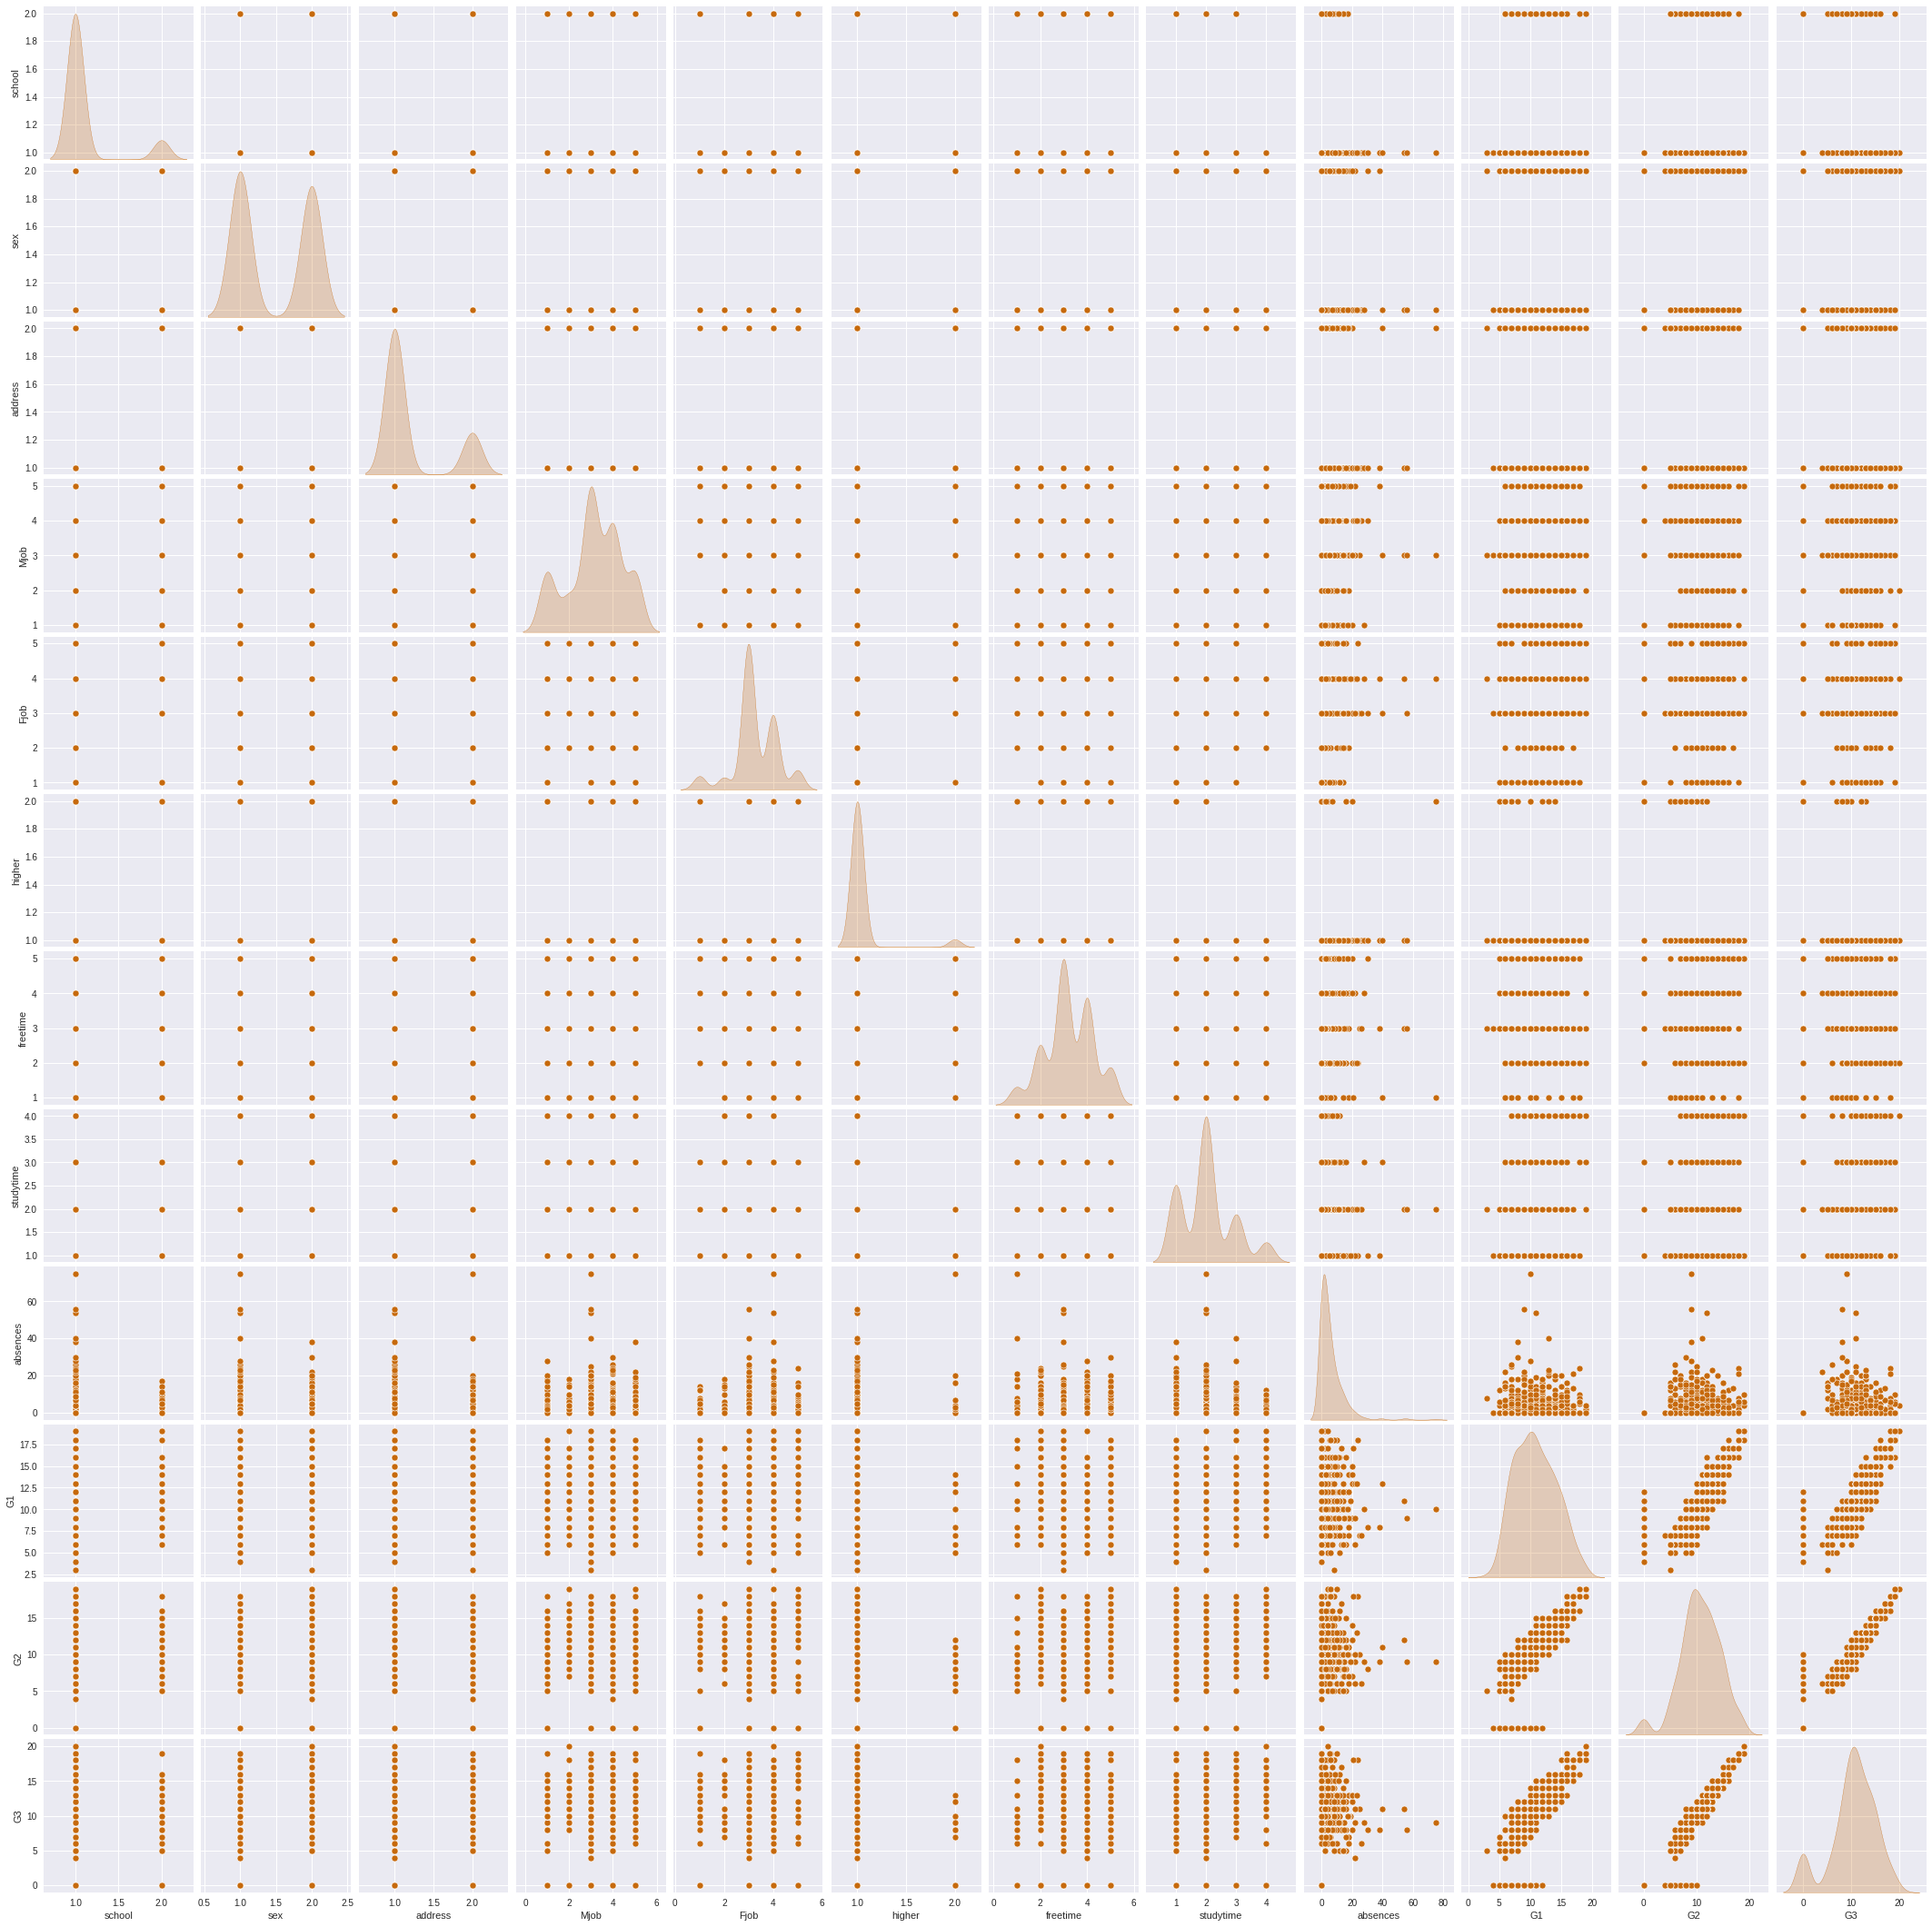

In [ ]:
#pairplot for all the values

sns.pairplot(math_data,
             x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
             y_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
       diag_kind='kde'
             )

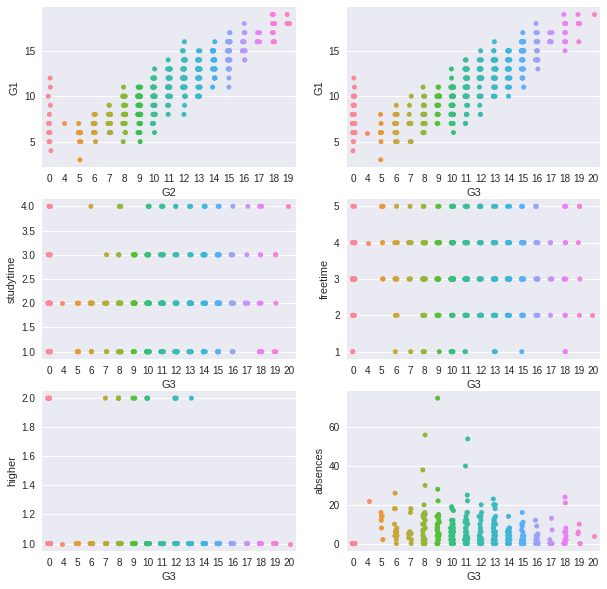

In [ ]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='G1', x='G2', data=math_data, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=math_data, hue=None, ax=axarr[0][1])
sns.stripplot(y='studytime', x='G3', data=math_data, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=math_data, hue=None,  ax=axarr[1][1])
sns.stripplot(y='higher', x='G3', data=math_data, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=math_data, hue=None, ax=axarr[2][1])

In [ ]:
#80-20 train-test percent split

trainDataset = math_data.sample(frac=0.8, random_state=0) 
testDataset = math_data.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        2     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    2        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    2        1     4     3  ...          2         4  11  11  11
31       1    2        1     4     4  ...          2         0  17  16  17
32       1    2        2     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 12)
(79, 12)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        2     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    2        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    2        1     4     3  ...          2         4  11  11  11
31       1    2        1     4     4  ...          2         0  17  16  17
32       1    2        2     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [ ]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64
